# Description

Runs hierarchical clustering on the z_score_std version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

3

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=3
env: OPEN_BLAS_NUM_THREADS=3
env: NUMEXPR_NUM_THREADS=3
env: OMP_NUM_THREADS=3


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
np.random.seed(0)

In [ ]:
NULL_DIR = conf.RESULTS["CLUSTERING_NULL_DIR"] / "shuffle_genes"

## Input data

In [6]:
INPUT_SUBSET = "z_score_std"

In [7]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [8]:
input_filepath = Path(
    NULL_DIR,
    "data_transformations",
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/opt/data/results/clustering/null_sims/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Clustering

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [11]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 75  # sqrt(3749) + some more to get closer to 295
CLUSTERING_OPTIONS["LINKAGE"] = {"ward", "complete", "average", "single"}
CLUSTERING_OPTIONS["AFFINITY"] = "euclidean"

display(CLUSTERING_OPTIONS)

{'K_MIN': 2,
 'K_MAX': 75,
 'LINKAGE': {'average', 'complete', 'single', 'ward'},
 'AFFINITY': 'euclidean'}

In [12]:
CLUSTERERS = {}

idx = 0

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for linkage in CLUSTERING_OPTIONS["LINKAGE"]:
        if linkage == "ward":
            affinity = "euclidean"
        else:
            affinity = "precomputed"

        clus = AgglomerativeClustering(
            n_clusters=k,
            affinity=affinity,
            linkage=linkage,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        idx = idx + 1

In [13]:
display(len(CLUSTERERS))

296

In [14]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('AgglomerativeClustering #0', AgglomerativeClustering())

('AgglomerativeClustering #1',
 AgglomerativeClustering(affinity='precomputed', linkage='complete'))

In [15]:
clustering_method_name = method_name
display(clustering_method_name)

'AgglomerativeClustering'

## Output directory

In [16]:
# output dir for this notebook
RESULTS_DIR = Path(
    NULL_DIR,
    "runs",
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/opt/data/results/clustering/null_sims/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [17]:
data = pd.read_pickle(input_filepath)

In [18]:
data.shape

(3752, 987)

In [19]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.175043,-0.710171,-1.000846,0.693026,0.409413,0.642958,1.767862,-1.070425,0.809395,-1.555050,...,-0.932802,0.371349,-0.521787,-0.881136,-1.193309,-0.257883,1.382268,0.066549,-0.866086,0.847997
100002_raw-Energy,0.531227,0.894062,1.191552,-0.143922,0.217867,0.529878,0.219561,-1.538143,-0.166704,1.042749,...,-0.601329,0.625139,-0.113048,-1.477163,0.746773,0.316892,-0.660407,1.501067,0.543744,1.094294
100003_raw-Protein,0.405395,0.925288,-0.339507,0.799476,-0.512075,0.586632,0.361706,0.226860,1.208289,-1.880931,...,-0.489171,0.276717,-0.159505,-1.271106,0.300351,0.595915,0.509020,-0.127540,-0.811987,-1.108812
100004_raw-Fat,-0.156230,0.881426,0.395527,-1.570256,1.240955,2.064595,-0.547373,-1.228389,0.319684,0.858253,...,-0.407151,-1.217662,-0.361052,0.813221,-0.692981,1.099523,-0.017366,0.361278,-0.017222,1.750511
100005_raw-Carbohydrate,-0.142531,-0.521907,1.069304,0.548122,-0.422146,-1.330718,-1.260872,1.003617,1.266289,0.065408,...,1.506698,-0.069854,-0.084662,-1.269536,-0.421185,0.431180,1.673162,-0.954336,0.026593,0.655359


In [20]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [21]:
from sklearn.metrics import pairwise_distances
from clustering.ensembles.utils import generate_ensemble

In [22]:
data_dist = pairwise_distances(data, metric=CLUSTERING_OPTIONS["AFFINITY"])

In [23]:
data_dist.shape

(3752, 3752)

In [24]:
pd.Series(data_dist.flatten()).describe().apply(str)

count            14077504.0
mean     44.253032582493354
std       3.958422459243249
min                     0.0
25%       42.96210983704978
50%       43.88530887125711
75%       44.85928523200602
max      114.65122575216462
dtype: object

In [25]:
ensemble = generate_ensemble(
    data_dist,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
    affinity_matrix=data_dist,
)

100%|██████████| 296/296 [34:18<00:00,  6.95s/it]


In [26]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(296, 3)

In [27]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
AgglomerativeClustering #0,"{'affinity': 'euclidean', 'compute_full_tree':...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
AgglomerativeClustering #1,"{'affinity': 'precomputed', 'compute_full_tree...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
AgglomerativeClustering #2,"{'affinity': 'precomputed', 'compute_full_tree...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
AgglomerativeClustering #3,"{'affinity': 'precomputed', 'compute_full_tree...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
AgglomerativeClustering #4,"{'affinity': 'euclidean', 'compute_full_tree':...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3


In [28]:
ensemble["n_clusters"].value_counts().head()

75    4
20    4
22    4
23    4
24    4
Name: n_clusters, dtype: int64

In [29]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    296.000000
mean      38.500000
std       21.396182
min        2.000000
25%       20.000000
50%       38.500000
75%       57.000000
max       75.000000
Name: n_clusters, dtype: float64

## Testing

In [30]:
assert ensemble_stats["min"] > 1

In [31]:
assert not ensemble["n_clusters"].isna().any()

In [32]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [33]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [34]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Add clustering quality measures

In [35]:
from sklearn.metrics import calinski_harabasz_score

In [36]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [37]:
ensemble.shape

(296, 4)

In [38]:
ensemble.head()

,clusterer_params,partition,n_clusters,ch_score
clusterer_id,,,,
AgglomerativeClustering #0,"{'affinity': 'euclidean', 'compute_full_tree':...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,1.953260
AgglomerativeClustering #1,"{'affinity': 'precomputed', 'compute_full_tree...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,8.158193
AgglomerativeClustering #2,"{'affinity': 'precomputed', 'compute_full_tree...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,8.158193
AgglomerativeClustering #3,"{'affinity': 'precomputed', 'compute_full_tree...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,8.158193
AgglomerativeClustering #4,"{'affinity': 'euclidean', 'compute_full_tree':...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2.813778


## Save

In [39]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        {k: v for k, v in CLUSTERING_OPTIONS.items() if k != "LINKAGE"},
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/opt/data/results/clustering/null_sims/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores/AgglomerativeClustering-AFFINITY_euclidean-K_MAX_75-K_MIN_2.pkl')

In [40]:
ensemble.to_pickle(output_filename)

# Cluster quality

In [41]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters"]).mean()
    display(_df)

,ch_score
n_clusters,
2,6.606960
3,6.063295
4,5.310389
5,4.928258
6,4.895411
7,4.628418
8,4.419210
9,4.335187
10,4.158273


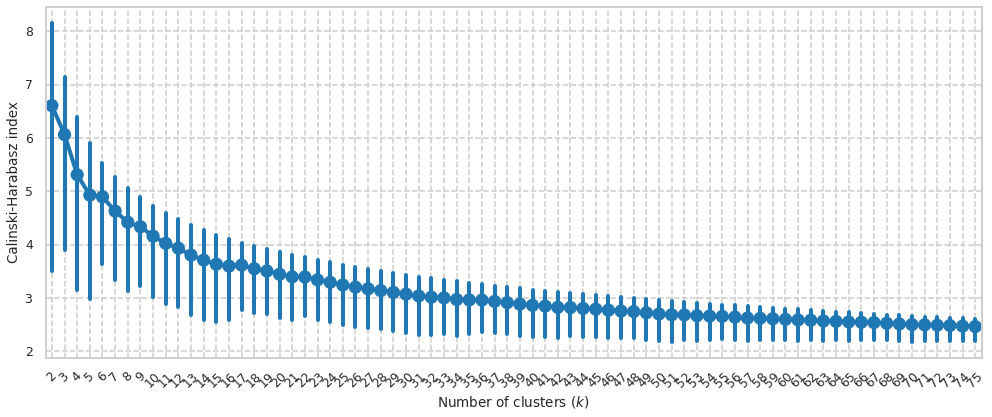

In [42]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [43]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [44]:
parts.head()

n_clusters
2    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
5    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
6    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
dtype: object

In [45]:
assert np.all(
    [
        parts.loc[k].shape == (len(CLUSTERING_OPTIONS["LINKAGE"]), data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [46]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [47]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [48]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

3     0.512616
5     0.511281
4     0.508515
2     0.506142
12    0.502786
8     0.502636
10    0.485902
9     0.483473
7     0.476849
11    0.469071
23    0.468118
74    0.460525
63    0.460259
75    0.458492
22    0.458478
Name: k, dtype: float64

In [49]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [50]:
parts_ari_df.shape

(74, 6)

In [51]:
assert (
    int(
        (len(CLUSTERING_OPTIONS["LINKAGE"]) * (len(CLUSTERING_OPTIONS["LINKAGE"]) - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [52]:
parts_ari_df.head()

,0,1,2,3,4,5
2,0.012284,0.012284,0.012284,1.0,1.000000,1.000000
3,0.025232,0.025232,0.025232,1.0,1.000000,1.000000
4,0.017029,0.017029,0.017029,1.0,1.000000,1.000000
5,0.022563,0.022563,0.022563,1.0,1.000000,1.000000
6,0.028206,0.028206,0.028206,1.0,0.799626,0.799626


## Save

In [53]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/opt/data/results/clustering/null_sims/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores/AgglomerativeClustering-stability-AFFINITY_euclidean-K_MAX_75-K_MIN_2-LINKAGE_ward_complete_average_single.pkl')

In [54]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [55]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [56]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [57]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,0.012284
1,2,1,0.012284
2,2,2,0.012284
3,2,3,1.000000
4,2,4,1.000000


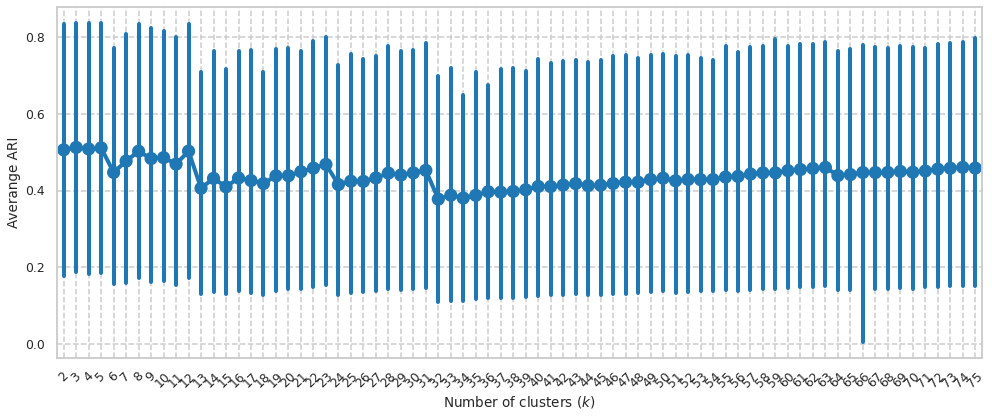

In [58]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()